# Random Forest

### X1

Best Parameters: {'max_depth': np.int64(14), 'n_estimators': np.int64(50)}
R² Score: 0.5434690016688434
Mean Absolute Error: 4.452833318622173
Root Mean Squared Error: 5.599213115190876


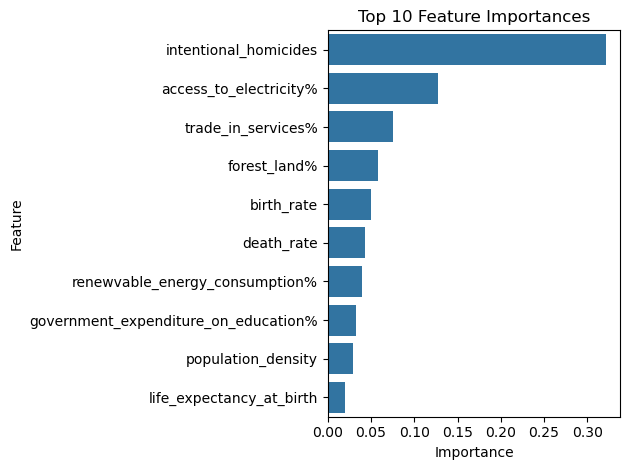

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
X_train = pd.read_csv("X1_train.csv")
X_test = pd.read_csv("X1_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()  # Flatten to 1D
y_test = pd.read_csv("y_test.csv").values.ravel()
groups = pd.read_csv("groups_train.csv")['country']

# Step 2: Define the RandomForestRegressor and grid of hyperparameters
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': np.arange(10, 300, 10),  
    'max_depth'   : np.arange(1, 30, 1),
}

# Use GroupKFold
group_kfold = GroupKFold(n_splits=5)

#Grid Search to optimize parameters
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=group_kfold,
                           scoring='r2',
                           n_jobs=-1,
                           )

# Step 4: Fit the model
grid_search.fit(X_train, y_train, groups=groups)

# Step 5: Make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 6: Evaluate
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

#Feature importance
importances = best_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()


### X2

In [3]:
X_train = pd.read_csv("X2_train.csv")
X_test = pd.read_csv("X2_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()  # Flatten to 1D
y_test = pd.read_csv("y_test.csv").values.ravel()
groups = pd.read_csv("groups_train.csv")['country']

# Step 2: Define the RandomForestRegressor and grid of hyperparameters
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': np.arange(10, 300, 10),  
    'max_depth'   : np.arange(1, 30, 1),
}

# Use GroupKFold
group_kfold = GroupKFold(n_splits=5)

#Grid Search to optimize parameters
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=group_kfold,
                           scoring='r2',
                           n_jobs=-1,
                           )

# Step 4: Fit the model
grid_search.fit(X_train, y_train, groups=groups)

# Step 5: Make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 6: Evaluate
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


Best Parameters: {'max_depth': np.int64(15), 'n_estimators': np.int64(120)}
R² Score: 0.49320289192685063
Mean Absolute Error: 4.560118940192304
Root Mean Squared Error: 5.899414701054902


### X3

In [5]:
X_train = pd.read_csv("X3_train.csv")
X_test = pd.read_csv("X3_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()  # Flatten to 1D
y_test = pd.read_csv("y_test.csv").values.ravel()
groups = pd.read_csv("groups_train.csv")['country']

# Step 2: Define the RandomForestRegressor and grid of hyperparameters
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': np.arange(10, 300, 10),  
    'max_depth'   : np.arange(1, 30, 1),
}


# Use GroupKFold
group_kfold = GroupKFold(n_splits=5)

#Grid Search to optimize parameters
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=group_kfold,
                           scoring='r2',
                           n_jobs=-1,
                           )

# Step 4: Fit the model
grid_search.fit(X_train, y_train, groups=groups)

# Step 5: Make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 6: Evaluate
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


Best Parameters: {'max_depth': np.int64(14), 'n_estimators': np.int64(260)}
R² Score: 0.497180303734318
Mean Absolute Error: 4.633552562572552
Root Mean Squared Error: 5.8762194017862


# Gradient Boosting

### X1

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_train = pd.read_csv("X1_train.csv")
X_test = pd.read_csv("X1_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()  # Flatten to 1D
y_test = pd.read_csv("y_test.csv").values.ravel()
groups = pd.read_csv("groups_train.csv")['country']

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define parameter grid
gbr_param_grid = {
    'n_estimators'  : np.arange(10, 250, 10),     
    'learning_rate' : np.arange(0.01, 0.31, 0.05), 
    'max_depth'     : np.arange(1, 13, 2),   
}
#Use Group K Fold
group_kfold = GroupKFold(n_splits=5)

# Grid search
gbr_grid = GridSearchCV(estimator=gbr,
                        param_grid=gbr_param_grid,
                        cv=group_kfold,
                        scoring='r2',
                        n_jobs=-1)

# Fit
gbr_grid.fit(X_train, y_train, groups = groups)
gbr_best = gbr_grid.best_estimator_

# Predict and evaluate
y_pred_gbr = gbr_best.predict(X_test)
print("Gradient Boosting Regressor:")
print("Best Parameters:", gbr_grid.best_params_)
print("R² Score:", r2_score(y_test, y_pred_gbr))
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))


Gradient Boosting Regressor:
Best Parameters: {'learning_rate': np.float64(0.16000000000000003), 'max_depth': np.int64(3), 'n_estimators': np.int64(20)}
R² Score: 0.5067864063477832
MAE: 4.70494670647871
RMSE: 5.819817699941705


### X2

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_train = pd.read_csv("X2_train.csv")
X_test = pd.read_csv("X2_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()  # Flatten to 1D
y_test = pd.read_csv("y_test.csv").values.ravel()
groups = pd.read_csv("groups_train.csv")['country']

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define parameter grid
gbr_param_grid = {
    'n_estimators'  : np.arange(10, 250, 10),     
    'learning_rate' : np.arange(0.01, 0.31, 0.05), 
    'max_depth'     : np.arange(1, 13, 2),   
}
#Use Group K Fold
group_kfold = GroupKFold(n_splits=5)

# Grid search
gbr_grid = GridSearchCV(estimator=gbr,
                        param_grid=gbr_param_grid,
                        cv=group_kfold,
                        scoring='r2',
                        n_jobs=-1)

# Fit
gbr_grid.fit(X_train, y_train, groups = groups)
gbr_best = gbr_grid.best_estimator_

# dump the fitted model to disk
joblib.dump(gbr_best, 'best_gbr_model.pkl')

# Predict and evaluate
y_pred_gbr = gbr_best.predict(X_test)
print("Gradient Boosting Regressor:")
print("Best Parameters:", gbr_grid.best_params_)
print("R² Score:", r2_score(y_test, y_pred_gbr))
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))

#Feature importance
importances = gbr_best.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

NameError: name 'GroupKFold' is not defined

### X3

In [8]:
X_train = pd.read_csv("X3_train.csv")
X_test = pd.read_csv("X3_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()  # Flatten to 1D
y_test = pd.read_csv("y_test.csv").values.ravel()
groups = pd.read_csv("groups_train.csv")['country']

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define parameter grid
gbr_param_grid = {
    'n_estimators'  : np.arange(10, 250, 10),     
    'learning_rate' : np.arange(0.01, 0.31, 0.05), 
    'max_depth'     : np.arange(1, 13, 2),   
}
#Use Group K Fold
group_kfold = GroupKFold(n_splits=5)

# Grid search
gbr_grid = GridSearchCV(estimator=gbr,
                        param_grid=gbr_param_grid,
                        cv=group_kfold,
                        scoring='r2',
                        n_jobs=-1)

# Fit
gbr_grid.fit(X_train, y_train, groups = groups)
gbr_best = gbr_grid.best_estimator_

# Predict and evaluate
y_pred_gbr = gbr_best.predict(X_test)
print("Gradient Boosting Regressor:")
print("Best Parameters:", gbr_grid.best_params_)
print("R² Score:", r2_score(y_test, y_pred_gbr))
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))


Gradient Boosting Regressor:
Best Parameters: {'learning_rate': np.float64(0.16000000000000003), 'max_depth': np.int64(3), 'n_estimators': np.int64(90)}
R² Score: 0.5043541009131246
MAE: 4.64187084317512
RMSE: 5.834150399899252


# K-Nearest Neighbors

### X1

In [9]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
X_train = pd.read_csv("X1_train.csv")
X_test = pd.read_csv("X1_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()  # Flatten to 1D
y_test = pd.read_csv("y_test.csv").values.ravel()
groups = pd.read_csv("groups_train.csv")['country']

knn_param_grid = {
    'n_neighbors': np.arange(1, 150, 1),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

#Use Group K Fold
group_kfold = GroupKFold(n_splits=5)

knn_grid = GridSearchCV(knn, knn_param_grid, cv=group_kfold, scoring='r2', n_jobs=-1)
knn_grid.fit(X_train, y_train, groups = groups)

# Evaluate KNN
knn_best = knn_grid.best_estimator_
knn_pred = knn_best.predict(X_test)

print("\n--- KNN Regressor ---")
print("Best Parameters:", knn_grid.best_params_)
print("R² Score:", r2_score(y_test, knn_pred))
print("MAE:", mean_absolute_error(y_test, knn_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, knn_pred)))



--- KNN Regressor ---
Best Parameters: {'n_neighbors': np.int64(42), 'p': 1, 'weights': 'distance'}
R² Score: 0.4541383651269094
MAE: 4.901804173229889
RMSE: 6.122561382457871


### X2

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
X_train = pd.read_csv("X2_train.csv")
X_test = pd.read_csv("X2_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()  # Flatten to 1D
y_test = pd.read_csv("y_test.csv").values.ravel()
groups = pd.read_csv("groups_train.csv")['country']

knn_param_grid = {
    'n_neighbors': np.arange(1, 150, 1),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}
#Use Group K Fold
group_kfold = GroupKFold(n_splits=5)

knn_grid = GridSearchCV(knn, knn_param_grid, cv=group_kfold, scoring='r2', n_jobs=-1)
knn_grid.fit(X_train, y_train, groups = groups)

# Evaluate KNN
knn_best = knn_grid.best_estimator_
knn_pred = knn_best.predict(X_test)

print("\n--- KNN Regressor ---")
print("Best Parameters:", knn_grid.best_params_)
print("R² Score:", r2_score(y_test, knn_pred))
print("MAE:", mean_absolute_error(y_test, knn_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, knn_pred)))



--- KNN Regressor ---
Best Parameters: {'n_neighbors': np.int64(42), 'p': 1, 'weights': 'distance'}
R² Score: 0.4392138198323823
MAE: 5.016222144896715
RMSE: 6.205696235134839


### X3

In [11]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
X_train = pd.read_csv("X3_train.csv")
X_test = pd.read_csv("X3_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()  # Flatten to 1D
y_test = pd.read_csv("y_test.csv").values.ravel()
groups = pd.read_csv("groups_train.csv")['country']

knn_param_grid = {
    'n_neighbors': np.arange(1, 150, 1),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

#Use Group K Fold
group_kfold = GroupKFold(n_splits=5)

knn_grid = GridSearchCV(knn, knn_param_grid, cv=group_kfold, scoring='r2', n_jobs=-1)
knn_grid.fit(X_train, y_train, groups = groups)

# Evaluate KNN
knn_best = knn_grid.best_estimator_
knn_pred = knn_best.predict(X_test)

print("\n--- KNN Regressor ---")
print("Best Parameters:", knn_grid.best_params_)
print("R² Score:", r2_score(y_test, knn_pred))
print("MAE:", mean_absolute_error(y_test, knn_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, knn_pred)))



--- KNN Regressor ---
Best Parameters: {'n_neighbors': np.int64(39), 'p': 1, 'weights': 'distance'}
R² Score: 0.4543574064103163
MAE: 4.981228686984552
RMSE: 6.121332840111686


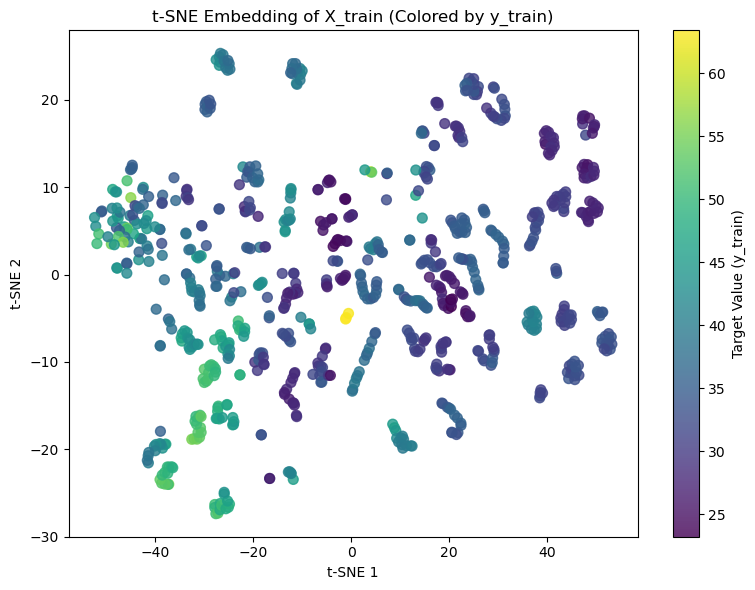

Traceback (most recent call last):
  File "/opt/miniforge3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniforge3/lib/python3.11/multiprocessing/queues.py", line 108, in get
    if not self._rlock.acquire(block, timeout):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt

Traceback (most recent call last):
  File "/opt/miniforge3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py", line 426, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniforge3/lib/python3.11/multiprocessing/queues.py", line 108, in get
    if not self._rlock.acquire(block, timeout):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt

Traceback (most recent call last):
  File 

In [12]:
from sklearn.manifold import TSNE
X_train = pd.read_csv("X2_train.csv")
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X_train)

# Plot t-SNE with colorbar as target
plt.figure(figsize=(8,6))
sc = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(sc, label='Target Value (y_train)')
plt.title("t-SNE Embedding of X_train (Colored by y_train)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()